# Demonstration of the lowEBMs Package

-----

- Installation
- Import
- Configuration
- Simulation

## Installation
----
In your linux terminal: __pip install lowEBMs__ 

Alternatively use the github-repository: https://github.com/BenniSchmiedel/Low-dimensional-EBMs

## Import
----
There are some modules which have to be imported. The core modules of any simulation run with the __lowEBMs__ are:

In [1]:
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise 
from lowEBMs.Packages.Variables import variable_importer, Vars, trackerreset
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation

To allow calculations use __numpy__ and for plotting for example __matplotlib__ :

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Configuration
---

The model is configured through an external __configuration.ini-file__! It includes:

- The specifications of the numerical integration
- The structure of the model equation
- The initial condition
- The parameters of the physical equation

# Demonstration 0D EBM
----


### Import the configuration with 

``importer()``

### Import variables and initial conditions with

``variable_importer()``

### If 1D, update to 1D parameters with

``add_sellersparameters()``

### Run the simulation with 

``rk4alg()``

In [4]:
configuration_OD_Spinup=importer('Demonstration_config_0D_Spinup.ini')

variable_importer(configuration_OD_Spinup,control=True,accuracy_number=10000)

Time_Spinup,ZMT_Spinup,GMT_Spinup=rk4alg(model_equation,configuration_OD_Spinup['eqparam'],configuration_OD_Spinup['rk4input'],configuration_OD_Spinup['funccomp'])

Loading Configuration from: Demonstration_config_0D_Spinup.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 10000 datapoints.
0D


Eq. State reached after 12905 steps, within 2.2323551177978516 seconds



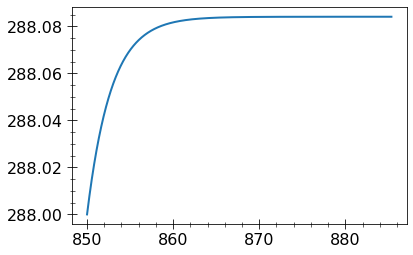

In [7]:
#plt.plot(Time_Spinup/const.time_sec_year,GMT_Spinup)

In [17]:
configuration_Crowley_OD=importer('Demonstration_config_Crowley_0D.ini')

variable_importer(configuration_Crowley_OD)

Vars.T,Vars.T_global=ZMT_Spinup[-1],GMT_Spinup[-1]
Time_Crowley_0D,ZMT_Crowley_0D,GMT_Crowley_0D=rk4alg(model_equation,configuration_Crowley_OD['eqparam'],configuration_Crowley_OD['rk4input'],configuration_Crowley_OD['funccomp'])

Loading Configuration from: Demonstration_config_Crowley_0D.ini
0D


In [10]:
import lowEBMs.Packages.Constants as const
from lowEBMs import update_plotstyle, moving_average
update_plotstyle()
import matplotlib
matplotlib.rcParams['lines.linewidth']=2

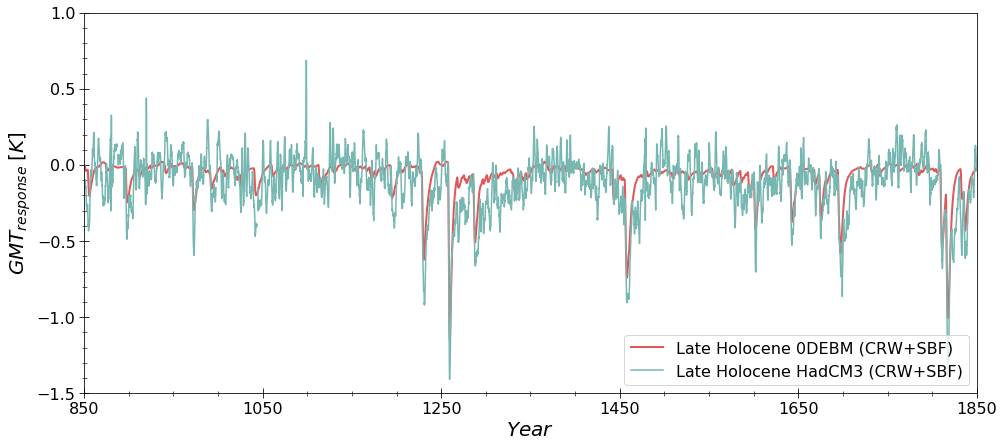

In [18]:
fig,ax=plt.subplots(1,1,figsize=(16,7))

plt.plot( Time_Crowley_0D/const.time_sec_year , GMT_Crowley_0D-GMT_Crowley_0D[0] ,\
         label='Late Holocene 0DEBM (CRW+SBF)' , c='#e15759' )


Time_HadCM3,GMT_HadCM3=np.loadtxt('Data/HadCM3_GMT_smoothed.txt',delimiter=',',unpack=True)
plt.plot(Time_HadCM3,GMT_HadCM3, label='Late Holocene HadCM3 (CRW+SBF)',c='#76b7b2', linewidth=1.5)


ax.set_xlim(850,1850),ax.set_xticks(np.linspace(850,1850,6))
ax.set_ylim(-1.5,1),ax.set_xlabel('$Year$'),ax.set_ylabel('$GMT_{response}\; [K]$')
plt.legend(fontsize=16,loc='lower right')

In [19]:
configuration_EVA_OD=importer('Demonstration_config_EVA_0D.ini')

variable_importer(configuration_EVA_OD)
Vars.T,Vars.T_global=ZMT_Spinup[-1],GMT_Spinup[-1]
Time_EVA_0D,ZMT_EVA_0D,GMT_EVA_0D=rk4alg(model_equation,configuration_EVA_OD['eqparam'],configuration_EVA_OD['rk4input'],configuration_EVA_OD['funccomp'])

Loading Configuration from: Demonstration_config_EVA_0D.ini
0D


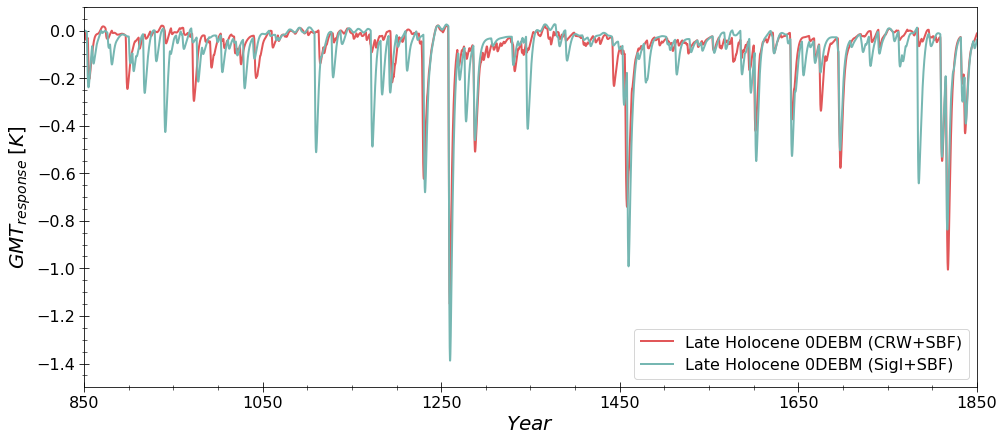

In [22]:
fig,ax=plt.subplots(1,1,figsize=(16,7))

plt.plot( Time_Crowley_0D/const.time_sec_year , GMT_Crowley_0D-GMT_Crowley_0D[0] ,\
         label='Late Holocene 0DEBM (CRW+SBF)' , c='#e15759' )

plt.plot( Time_EVA_0D/const.time_sec_year , GMT_EVA_0D-GMT_Crowley_0D[0] ,\
         label='Late Holocene 0DEBM (Sigl+SBF)' ,c='#76b7b2' )

ax.set_xlim(850,1850),ax.set_xticks(np.linspace(850,1850,6))
ax.set_ylim(-1.5,0.1),ax.set_xlabel('$Year$'),ax.set_ylabel('$GMT_{response}\; [K]$')
plt.legend(fontsize=16,loc='lower right')

# Demonstration 1D EBM
---

In [122]:
configuration_1D=importer('GFI_Talk/Demonstration_config_1D.ini')

variable_importer(configuration_1D,control=True)

configuration_1D,ParasCTRL=add_sellersparameters(configuration_1D,\
                                    parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)

Time_1D,ZMT_1D,GMT_1D=rk4alg(model_equation,configuration_1D['eqparam'],configuration_1D['rk4input'],configuration_1D['funccomp'])

Loading Configuration from: GFI_Talk/Demonstration_config_1D.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


Eq. State reached after 28625 steps, within 40.45265603065491 seconds


In [137]:
from lowEBMs.Packages.Variables import Vars

Text(0.5, 1.0, 'ZMT 1D-EBM Spinup')

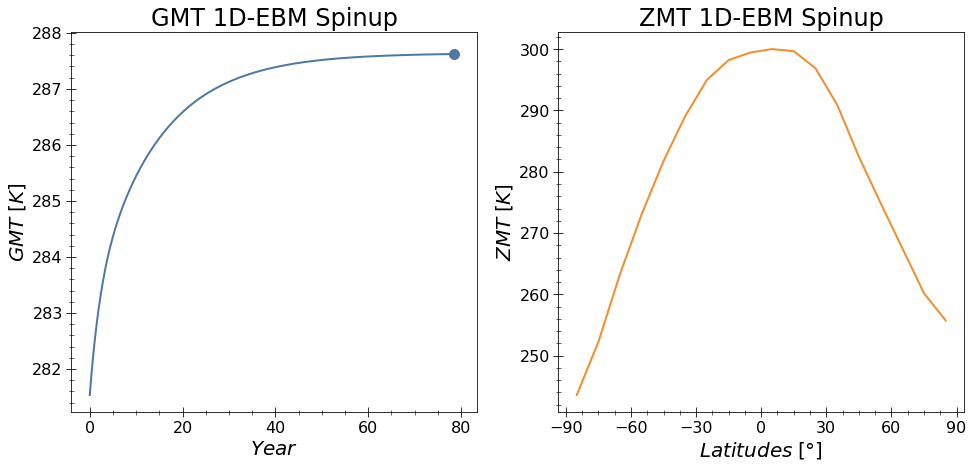

In [150]:
fig,ax=plt.subplots(1,2,figsize=(16,7))


ax[0].plot(Time_1D[1:]/const.time_sec_year,GMT_1D[1:],c='#4e79a7')
ax[0].scatter(Time_1D[-1]/const.time_sec_year,GMT_1D[-1],c='#4e79a7')

ax[0].set_xlabel('$Year$'),ax[0].set_ylabel('$GMT\; [K]$')
ax[0].set_title('GMT 1D-EBM Spinup')

ax[1].plot(Vars.Lat,ZMT_1D[-1],c='#f28e2b')

ax[1].set_xlabel('$Latitudes\; [°]$'),ax[1].set_ylabel('$ZMT\; [K]$')
ax[1].set_xticks(np.linspace(-90,90,7))
ax[1].set_title('ZMT 1D-EBM Spinup')